In [2]:
import pandas as pd
import numpy as np
from copy import deepcopy
import seaborn as sns
from matplotlib import pyplot as plt


In [7]:
df = pd.read_csv(r'C:\Users\sky\Documents\PythonScripts\movie_metadata.csv')

In [8]:
#using director facebook likes and actor facebook likes column into new dataset. i.e 5th and 6th column
dfSubset = df.iloc[:,4:6]

In [10]:
#Running kmeans cluster
# replaced missing values with 100
dfSubset.director_facebook_likes = dfSubset.director_facebook_likes.fillna(100)
dfSubset.actor_3_facebook_likes = dfSubset.actor_3_facebook_likes.fillna(100)

In [13]:
from sklearn.cluster import KMeans

In [14]:
kmeansfunction = KMeans(n_clusters=5)

In [15]:
Movies_kmeans = kmeansfunction.fit(dfSubset)

In [16]:
Movies_kmeans.cluster_centers_ # 5 clusters with 2 coordinates for 2 variables with 5 centroids
Movies_kmeans.labels_ # gives cluster numeber for each observation in original data

array([0, 0, 0, ..., 0, 0, 0])

In [17]:
# Appending cluster number to original data
# converting to data frame with a column name
ClNum = pd.DataFrame(Movies_kmeans.labels_, columns=['ClusterNumber'])

In [19]:
# gives unique number of clusters. Cluster number is starting 0
np.unique(ClNum['ClusterNumber'])
# concatenating clusters variable with Movie data
Final_Movies = pd.concat([dfSubset,ClNum],axis=1)

C:\Users\sky\anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


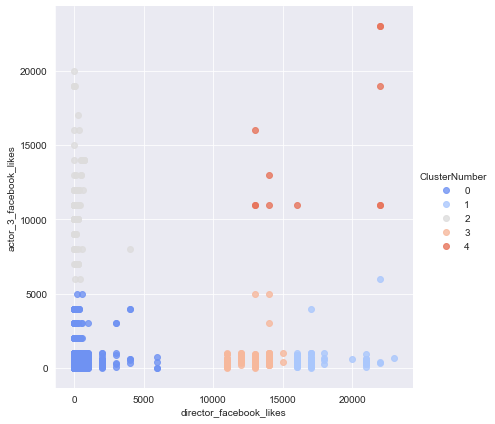

In [23]:
# Visuals of clusters
sns.set_style('darkgrid')
sns.lmplot('director_facebook_likes','actor_3_facebook_likes',data=Final_Movies,hue='ClusterNumber',palette='coolwarm',size=6,aspect=1,fit_reg=False)

In [21]:
Final_Movies

,director_facebook_likes,actor_3_facebook_likes,ClusterNumber
0,0,855,0
1,563,1000,0
2,0,161,0
3,22000,23000,4
4,131,49,0
...,...,...,...
5038,2,318,0
5039,49,319,0
5040,0,0,0
5041,0,489,0
